# IMPORTANDO AS BIBLIOTECAS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
print("Bibliotecas importadas")

# função para chegar o dataset

def data_check(df):
    print('DataFrame Shape: \n',df.shape[0], 'Rows\n',df.shape[1],' Columns')
    print('---------------------------------------------------------------------------------------------')
    print('Column Headers: \n',list(df.columns))
    print('---------------------------------------------------------------------------------------------')
    print('Missing Values: \n',df.isnull().sum()/len(df))
    print('---------------------------------------------------------------------------------------------')
    print('Data Types:\n',df.dtypes)
    print('---------------------------------------------------------------------------------------------')
    print('Data Describe:\n',df.describe())   
    print('---------------------------------------------------------------------------------------------')   

Bibliotecas importadas


# Carregando os dados

In [3]:
town_state=pd.read_csv('/content/drive/MyDrive/TCC/town_state.csv')

In [4]:
town_state.head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


In [ ]:
%%time
town_state=pd.read_csv('/content/drive/MyDrive/TCC/town_state.csv')
produtos = pd.read_csv('/content/drive/MyDrive/TCC/producto_tabla.csv', sep = ",")
clientes = pd.read_csv('/content/drive/MyDrive/TCC/cliente_tabla.csv', sep = ",")
types = {'Semana':np.uint8, 'Agencia_ID':np.uint16, 'Canal_ID':np.uint8,
         'Ruta_SAK':np.uint16, 'Cliente_ID':np.uint32, 'Producto_ID':np.uint16,
        'Venta_hoy':np.float16,'Venta_uni_hoy': np.uint32,'Dev_uni_proxima':np.uint32,
        'Dev_proxima':np.float16,
         'Demanda_uni_equil':np.uint32}

df_train = pd.read_csv('/content/drive/MyDrive/TCC/train.csv', usecols=types.keys(), dtype=types)
df_test = pd.read_csv('/content/drive/MyDrive/TCC/test.csv')

CPU times: user 52.2 s, sys: 9.78 s, total: 1min 2s
Wall time: 1min 18s


In [ ]:
df_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.140625,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.531250,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.312500,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.531250,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.921875,0,0.0,3


In [ ]:
df_test.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [ ]:
produtos.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [ ]:
clientes.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [ ]:
town_state.head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


# Data Check 

In [ ]:
data_check(df_train)

DataFrame Shape: 
 74180464 Rows
 11  Columns
---------------------------------------------------------------------------------------------
Column Headers: 
 ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima', 'Demanda_uni_equil']
---------------------------------------------------------------------------------------------
Missing Values: 
 Semana               0.0
Agencia_ID           0.0
Canal_ID             0.0
Ruta_SAK             0.0
Cliente_ID           0.0
Producto_ID          0.0
Venta_uni_hoy        0.0
Venta_hoy            0.0
Dev_uni_proxima      0.0
Dev_proxima          0.0
Demanda_uni_equil    0.0
dtype: float64
---------------------------------------------------------------------------------------------
Data Types:
 Semana                 uint8
Agencia_ID            uint16
Canal_ID               uint8
Ruta_SAK              uint16
Cliente_ID            uint32
Producto_ID           uin

In [ ]:
data_check(df_test)

DataFrame Shape: 
 6999251 Rows
 7  Columns
---------------------------------------------------------------------------------------------
Column Headers: 
 ['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']
---------------------------------------------------------------------------------------------
Missing Values: 
 id             0.0
Semana         0.0
Agencia_ID     0.0
Canal_ID       0.0
Ruta_SAK       0.0
Cliente_ID     0.0
Producto_ID    0.0
dtype: float64
---------------------------------------------------------------------------------------------
Data Types:
 id             int64
Semana         int64
Agencia_ID     int64
Canal_ID       int64
Ruta_SAK       int64
Cliente_ID     int64
Producto_ID    int64
dtype: object
---------------------------------------------------------------------------------------------
Data Describe:
                  id        Semana    Agencia_ID      Canal_ID      Ruta_SAK  \
count  6.999251e+06  6.999251e+06  6.999251

In [ ]:
data_check(produtos)

DataFrame Shape: 
 2592 Rows
 2  Columns
---------------------------------------------------------------------------------------------
Column Headers: 
 ['Producto_ID', 'NombreProducto']
---------------------------------------------------------------------------------------------
Missing Values: 
 Producto_ID       0.0
NombreProducto    0.0
dtype: float64
---------------------------------------------------------------------------------------------
Data Types:
 Producto_ID        int64
NombreProducto    object
dtype: object
---------------------------------------------------------------------------------------------
Data Describe:
         Producto_ID
count   2592.000000
mean   32591.095679
std    13004.091024
min        0.000000
25%    31515.500000
50%    35224.000000
75%    40447.250000
max    49997.000000
---------------------------------------------------------------------------------------------


In [ ]:
data_check(clientes)

DataFrame Shape: 
 935362 Rows
 2  Columns
---------------------------------------------------------------------------------------------
Column Headers: 
 ['Cliente_ID', 'NombreCliente']
---------------------------------------------------------------------------------------------
Missing Values: 
 Cliente_ID       0.0
NombreCliente    0.0
dtype: float64
---------------------------------------------------------------------------------------------
Data Types:
 Cliente_ID        int64
NombreCliente    object
dtype: object
---------------------------------------------------------------------------------------------
Data Describe:
          Cliente_ID
count  9.353620e+05
mean   2.356559e+06
std    2.832500e+06
min    0.000000e+00
25%    6.619722e+05
50%    1.901716e+06
75%    4.361787e+06
max    2.015152e+09
---------------------------------------------------------------------------------------------


In [ ]:
data_check(town_state)

DataFrame Shape: 
 790 Rows
 3  Columns
---------------------------------------------------------------------------------------------
Column Headers: 
 ['Agencia_ID', 'Town', 'State']
---------------------------------------------------------------------------------------------
Missing Values: 
 Agencia_ID    0.0
Town          0.0
State         0.0
dtype: float64
---------------------------------------------------------------------------------------------
Data Types:
 Agencia_ID     int64
Town          object
State         object
dtype: object
---------------------------------------------------------------------------------------------
Data Describe:
          Agencia_ID
count    790.000000
mean    8531.505063
std     9908.708738
min     1110.000000
25%     1513.500000
50%     2063.500000
75%    21616.500000
max    25769.000000
---------------------------------------------------------------------------------------------


# Eliminando inconsistências nos datasets 
### A documentação nos alerta sobre problemas que devem ser tratados no dataset


## DATASET CLIENTES

In [ ]:
print(clientes.duplicated().sum()) # aparentemente nenhum cliente duplicado, verificando mais afundo podemos ver que existem IDs duplicados
print('CLIENTES DUPLICADOS')
print(clientes['Cliente_ID'].duplicated().sum())

0
CLIENTES DUPLICADOS
4862


In [ ]:
clientes.drop_duplicates(subset=['Cliente_ID'],inplace=True) #retirando ids duplicados

In [ ]:
clientes.head(10)

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
6,5,LA VAQUITA
7,6,LUPITA
8,7,I M EL GUERO
9,8,MINI SUPER LOS LUPES
10,9,SUPER KOMPRAS MICRO COLON


In [ ]:
# verificando o número clientes sem o nome
clientes[clientes['NombreCliente'] == 'SIN NOMBRE'].count()

Cliente_ID       356
NombreCliente    356
dtype: int64

## DATASET PRODUTOS

In [ ]:
produtos.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [ ]:
print('PRODUTOS DUPLICADOS')
print(produtos['Producto_ID'].duplicated().sum())

PRODUTOS DUPLICADOS
0


In [ ]:
produtos[produtos['NombreProducto']=='NO IDENTIFICADO 0']

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0


A variável NombreProducto contém outras informações além do nome do produto.

<p style="text-align: center; font-size:30px;">Produtos

| **NombreProducto** |	Nome do produto	| Número de peças|	Peso	| Sigla do fabricante |	ID do produto |

In [ ]:
# extraindo outras informações

produtos['nome_produto'] = produtos['NombreProducto'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
peso = produtos['NombreProducto'].str.extract('(\d+)(Kg|kg|G|g) ', expand=True)
produtos['peso'] = peso[0].astype('float')*peso[1].map({'Kg':1000,'KG':1000,'G':1,'g':1})
produtos['numero_peças|'] = produtos['NombreProducto'].str.extract('(\d+)p ', expand=False).astype('float')
produtos['sigla_fabricante'] = produtos['NombreProducto'].str.extract('^.+\s(\D+) \d+$', expand=False)

In [ ]:
produtos.drop(columns=["NombreProducto"],inplace=True)

In [ ]:
produtos.head()

,Producto_ID,nome_produto,peso,numero_peças|,sigla_fabricante
0,0,NO IDENTIFICADO,NaN,NaN,IDENTIFICADO
1,9,Capuccino Moka,750.0,NaN,NES
2,41,Bimbollos Ext sAjonjoli,480.0,6.0,BIM
3,53,Burritos Sincro,170.0,NaN,LON
4,72,Div Tira Mini Doradita,45.0,4.0,TR


In [ ]:
produtos.isnull().sum()

Producto_ID            0
nome_produto           0
peso                 112
numero_peças|       1475
sigla_fabricante       1
dtype: int64

Não foi possível determinar o peso de 112, a quantidade de 1475 e a sigla de 1 fabricante dos produtos

In [ ]:
produtos['nome_produto'].value_counts(dropna=False)

Pan Blanco                  39
Tortillinas                 37
Deliciosas Vainilla         35
Medias Noches               25
Wonder                      22
                            ..
Barra Coco GV                1
Tortilla Precocida           1
Principe Mix                 1
Tostachos Queso              1
Max Two Pack Elote Mango     1
Name: nome_produto, Length: 1017, dtype: int64

## DATASET TOWN

In [ ]:
town_state.isnull().sum()

Agencia_ID    0
Town          0
State         0
dtype: int64

Nenhum valor faltante no dataset town

In [ ]:
town_state.duplicated().sum()

0

Nenhum valor duplicado no dataset

In [ ]:
town_state['Agencia_ID'].duplicated().sum()

0

Nenhuma Agência com id duplicado no dateset

## DATASET TRAIN

USAREMOS SOMENTE OS DADOS DA NONA SEMANA, UTILIZAREMOS AS SEMANAS ANTERIORES PARA CONSTRUIR NOVAS FEATURES PARA O MODELO.

In [ ]:
train = df_train[df_train.Semana==9] 

In [ ]:
train['Semana'].unique()

array([9], dtype=uint8)

In [ ]:
train.isnull().sum()

Semana               0
Agencia_ID           0
Canal_ID             0
Ruta_SAK             0
Cliente_ID           0
Producto_ID          0
Venta_uni_hoy        0
Venta_hoy            0
Dev_uni_proxima      0
Dev_proxima          0
Demanda_uni_equil    0
dtype: int64

Nenhum valor faltante no dataset train

## DATASET TESTE

In [ ]:
df_test['Semana'].unique()

In [ ]:
df_test.columns

OBS: As variáveis Venta_uni_hoy, Venta_hoy, Dev_uni_proxima e Dev_proxima não estão presentes no conjunto de dados de teste.

In [ ]:
df_test.duplicated().sum()

Nenhum valor duplicado foi encontrado no dataset teste

In [ ]:
df_test.isnull().sum()

Foi encontrado 1 valor faltante nas colunas Canal_ID, Ruta_SAK, Cliente_ID, Producto_ID.

# Análise Exploratória

# Análise Preditiva

## Importando as bibliotecas necessárias

In [ ]:
#bibliotecas
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Feature Selection

In [ ]:
# Excluindo as váriasveis Venta_uni_hoy, Venta_hoy, Dev_uni_proxima e Dev_proxima não estão no conjunto de teste.

train.drop(columns=[ 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima' ,'Dev_proxima'] , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## target

Text(0.5, 1.0, 'Histogram of Demanda_uni_equil')

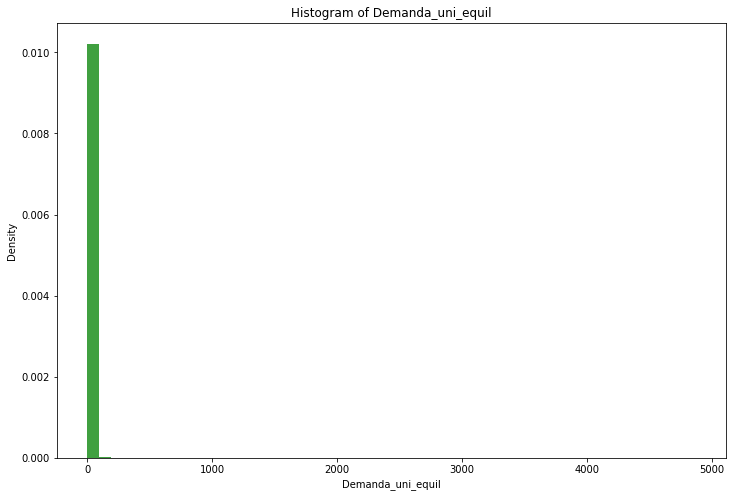

In [ ]:
# Histograma para visualizar a distribuição dos dados da variável Demanda_uni_equil.
plt.rcParams["figure.figsize"] = (12,8)
plt.hist(train['Demanda_uni_equil'],50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Demanda_uni_equil')
plt.ylabel('Density')
plt.title('Histogram of Demanda_uni_equil')

Podemos ver uma distorção nos dados a está bastante enviesadas à direita, para lidar com isso usaremos a transformação log1p (ou log(x + 1)) para diminuir a irregularidade e aproximar a distruibuição proxima a distribuição normal.

Após a análise preditiva, os dados voltam para a escala original.

Text(0.5, 1.0, 'Histogram of np.log1p(Demanda_uni_equil)')

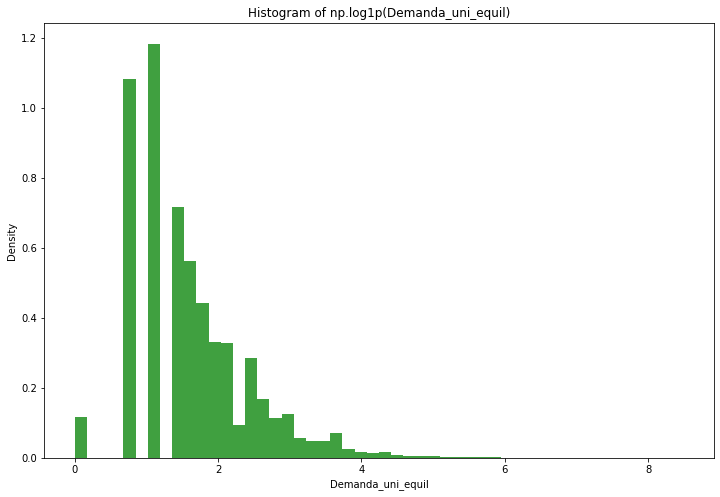

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.hist(np.log1p(train['Demanda_uni_equil']) ,50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Demanda_uni_equil')
plt.ylabel('Density')
plt.title('Histogram of np.log1p(Demanda_uni_equil)')

In [ ]:
train.loc[:,'Demanda_uni_equil']  = np.log1p(train.Demanda_uni_equil)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil
63771751,9,1110,7,3301,15766,1212,0.693147
63771752,9,1110,7,3301,15766,1238,1.098612
63771753,9,1110,7,3301,15766,1240,1.098612
63771754,9,1110,7,3301,15766,1242,0.693147
63771755,9,1110,7,3301,15766,1250,2.397895
...,...,...,...,...,...,...,...
74180459,9,25759,1,5517,4528866,32873,1.609438
74180460,9,25759,1,5517,4528866,34226,1.609438
74180461,9,25759,1,5517,4528866,45112,1.609438
74180462,9,25759,1,5517,4547943,40217,0.000000


## Unindo os dados de trieno e de teste em um mesmo dataset

Unificar o dataset contendo os dados de treino e teste.

In [ ]:
train.columns

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Demanda_uni_equil'],
      dtype='object')

In [ ]:
df_test.columns

Index(['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID'],
      dtype='object')

O dataset train contém a coluna **Demanda_uni_equil** que não está presente no dataset test, já no dataset test existe uma coluna **id** que não está presente no dataset train. Assim criaremos uma coluna **id** no dataset train e uma coluna **Demanda_uni_equil** no dataset test com o valor 0. Além disse, será criada uma nova coluna para identificar quais os dados de test, a coluna terá o nome **teste** e 0 representará que o dataset é train e 1 test.

In [ ]:
train['id']=0
train['test']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_test['Demanda_uni_equil']=0
df_test['test']=1

In [ ]:
print('número de linhas train: ' + str(train.shape[0]))
print('número de linhas df_test: ' + str(df_test.shape[0]))

número de linhas train: 10408713
número de linhas df_test: 6999251


In [ ]:
train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,id,test
63771751,9,1110,7,3301,15766,1212,0.693147,0,0
63771752,9,1110,7,3301,15766,1238,1.098612,0,0
63771753,9,1110,7,3301,15766,1240,1.098612,0,0
63771754,9,1110,7,3301,15766,1242,0.693147,0,0
63771755,9,1110,7,3301,15766,1250,2.397895,0,0
...,...,...,...,...,...,...,...,...,...
74180459,9,25759,1,5517,4528866,32873,1.609438,0,0
74180460,9,25759,1,5517,4528866,34226,1.609438,0,0
74180461,9,25759,1,5517,4528866,45112,1.609438,0,0
74180462,9,25759,1,5517,4547943,40217,0.000000,0,0


In [ ]:
df_test

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,test
0,0,11,4037,1,2209,4639078,35305,0,1
1,1,11,2237,1,1226,4705135,1238,0,1
2,2,10,2045,1,2831,4549769,32940,0,1
3,3,11,1227,1,4448,4717855,43066,0,1
4,4,11,1219,1,1130,966351,1277,0,1
...,...,...,...,...,...,...,...,...,...
6999246,6999246,11,2057,1,1153,4379638,1232,0,1
6999247,6999247,10,1334,1,2008,970421,43069,0,1
6999248,6999248,11,1622,1,2869,192749,30532,0,1
6999249,6999249,11,1636,1,4401,286071,35107,0,1


In [ ]:
df_uni = pd.concat([train, df_test])

In [ ]:
df_uni

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,id,test
63771751,9,1110,7,3301,15766,1212,0.693147,0,0
63771752,9,1110,7,3301,15766,1238,1.098612,0,0
63771753,9,1110,7,3301,15766,1240,1.098612,0,0
63771754,9,1110,7,3301,15766,1242,0.693147,0,0
63771755,9,1110,7,3301,15766,1250,2.397895,0,0
...,...,...,...,...,...,...,...,...,...
6999246,11,2057,1,1153,4379638,1232,0.000000,6999246,1
6999247,10,1334,1,2008,970421,43069,0.000000,6999247,1
6999248,11,1622,1,2869,192749,30532,0.000000,6999248,1
6999249,11,1636,1,4401,286071,35107,0.000000,6999249,1


## Feature Engennier -  criandos novas features

In [ ]:
# Determinando a média da demanda ajustada de clientes por produto e a quantidade de registros de clientes por produto.
df_uni = pd.merge(df_uni ,df_train[(df_train['Semana']>4) & (df_train['Semana']<=8)].groupby(['Cliente_ID','Producto_ID']).agg({'Demanda_uni_equil':'mean', 'Cliente_ID':'size'}).rename(columns={'Demanda_uni_equil':'mediaClientProd','Cliente_ID':'quantClientProd'}).reset_index(), how='left',
                    left_on=['Cliente_ID','Producto_ID'], 
                    right_on=['Cliente_ID','Producto_ID'],
                    left_index=False, right_index=False, sort=True,
                    suffixes=('_x', '_y'), copy=False, )


In [ ]:
# Determinando a média da demanda ajustada por produto e a quantidade de registros por produto.
df_uni = pd.merge(df_uni ,df_train[(df_train['Semana']>4) & (df_train['Semana']<=8)].groupby(['Producto_ID']).agg({'Demanda_uni_equil':'mean', 'Cliente_ID':'size'}).rename(columns={'Demanda_uni_equil':'mediaProd','Cliente_ID':'quantProd'}).reset_index(), how='left',
                    left_on=['Producto_ID'], 
                    right_on=['Producto_ID'],
                    left_index=False, right_index=False, sort=True,
                    suffixes=('_x', '_y'), copy=False, )


In [ ]:
# Determinando a média da demanda ajustada por cliente e a quantidade de registros por produto.
df_uni = pd.merge(df_uni ,df_train[(df_train['Semana']>4) & (df_train['Semana']<=8)].groupby(['Cliente_ID']).agg({'Demanda_uni_equil':'mean', 'Cliente_ID':'size'}).rename(columns={'Demanda_uni_equil':'mediaClient','Cliente_ID':'quantClient'}).reset_index(), how='left',
                    left_on=['Cliente_ID'], 
                    right_on=['Cliente_ID'],
                    left_index=False, right_index=False, sort=True,
                    suffixes=('_x', '_y'), copy=False, )

In [ ]:
df_uni

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,id,test,mediaClientProd,quantClientProd,mediaProd,quantProd,mediaClient,quantClient
0,9,2655,2,4189,26,30235,4.574711,0,0,NaN,NaN,32.435081,1602.0,27.091603,131.0
1,9,2061,2,7212,26,31393,2.639057,0,0,17.5,4.0,11.782707,13300.0,27.091603,131.0
2,10,2655,2,4189,26,31518,0.000000,1569352,1,NaN,NaN,13.333333,129.0,27.091603,131.0
3,11,2655,2,4189,26,31520,0.000000,4728674,1,NaN,NaN,27.497359,1136.0,27.091603,131.0
4,9,2061,2,7212,26,32962,2.397895,0,0,NaN,NaN,20.038141,5873.0,27.091603,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17407959,11,22362,1,900,2015152015,2233,0.000000,1889878,1,18.5,2.0,5.511298,1116261.0,39.789474,19.0
17407960,9,22362,1,900,2015152015,2665,2.397895,0,0,4.0,1.0,5.089970,161898.0,39.789474,19.0
17407961,9,22362,1,900,2015152015,4280,2.197225,0,0,NaN,NaN,7.229038,223509.0,39.789474,19.0
17407962,10,22362,1,900,2015152015,4280,0.000000,1066859,1,NaN,NaN,7.229038,223509.0,39.789474,19.0


In [ ]:
df_uni.isnull().sum()

Semana                     0
Agencia_ID                 0
Canal_ID                   0
Ruta_SAK                   0
Cliente_ID                 0
Producto_ID                0
Demanda_uni_equil          0
id                         0
test                       0
mediaClientProd      4367112
quantClientProd      4367112
mediaProd             146055
quantProd             146055
mediaClient           114937
quantClient           114937
dtype: int64

In [ ]:
df_uni.fillna(0, inplace=True) # substituindo os valores faltantes por 0

In [ ]:
df_uni.isnull().sum()

Semana               0
Agencia_ID           0
Canal_ID             0
Ruta_SAK             0
Cliente_ID           0
Producto_ID          0
Demanda_uni_equil    0
id                   0
test                 0
mediaClientProd      0
quantClientProd      0
mediaProd            0
quantProd            0
mediaClient          0
quantClient          0
dtype: int64

In [ ]:
path = '/content/drive/MyDrive/TCC/df_final.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_uni.to_csv(f)